In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
"""
Loading necessary libraries and model
"""
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import os 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
model = ResNet50(weights='imagenet')

In [ ]:
data_dir = '/content/drive/Shareddrives/ComED Codes and Data/Keras /temp_data/'
class_0 = "with UPC"
class_1 = "without UPC"

def get_object_dict(data_dir,class_name, model, top_k):
  files_path = data_dir + class_name
  files = os.listdir(files_path)

  """ Initialized dictionary for objects associated with images """ 
  object_prob_dict = {} 

  image_objects = {} #initialized to get only image and list of objects associated with it.

  for img in files:
    img_path = files_path +"/"+ img
    image_ = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(image_)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    # decode the results into a list of tuples (class, description, probability)
    # (one such list for each sample in the batch)
    # decode_predictions(preds, top=20)[0]

    object_prob_dict[img] = decode_predictions(preds, top=top_k)[0]


  for key, value in object_prob_dict.items():
    temp = [] 
    for k in value:
      # print(k[1])
      temp.append(k[1])
    image_objects[key] = ', '.join(temp)

  return object_prob_dict, image_objects



In [ ]:
UPC_object_prob, UPC_objects = get_object_dict(data_dir,class_0,model,10)

w_o_UPC_prob, w_o_UPC_objects = get_object_dict(data_dir,class_1,model,10)

In [ ]:
# Sanity check with out UPC in them 
w_o_UPC_objects

{'gsv_326.jpg': 'mobile_home, freight_car, mailbox, pole, moving_van, passenger_car, prison, trailer_truck, traffic_light, shopping_cart',
 'gsv_327.jpg': 'passenger_car, freight_car, streetcar, trailer_truck, steam_locomotive, alp, chainlink_fence, mailbox, car_mirror, electric_locomotive',
 'gsv_344.jpg': 'limousine, beach_wagon, pickup, cab, minivan, convertible, tow_truck, police_van, ambulance, car_wheel',
 'gsv_345.jpg': 'limousine, passenger_car, convertible, beach_wagon, trailer_truck, sports_car, minivan, car_wheel, cab, minibus',
 'gsv_346.jpg': 'convertible, limousine, beach_wagon, sports_car, minivan, golfcart, car_wheel, cab, jeep, grille',
 'gsv_347.jpg': 'minivan, beach_wagon, jeep, convertible, mobile_home, limousine, recreational_vehicle, motor_scooter, golfcart, tow_truck',
 'gsv_348.jpg': 'limousine, passenger_car, beach_wagon, minivan, cab, convertible, minibus, sports_car, mobile_home, freight_car',
 'gsv_349.jpg': 'beach_wagon, convertible, limousine, passenger_ca

In [ ]:
UPC_objects 

{'Copy of gsv_0.jpg': 'fountain, stupa, fireboat, chainlink_fence, quill, greenhouse, alp, radio_telescope, lakeside, brass',
 'Copy of gsv_1.jpg': 'fountain, recreational_vehicle, mobile_home, chainlink_fence, stupa, radio_telescope, fireboat, picket_fence, balloon, trailer_truck',
 'Copy of gsv_3.jpg': 'alp, stupa, trolleybus, car_mirror, thatch, church, picket_fence, pole, volcano, valley',
 'Copy of gsv_4.jpg': 'crane, prison, stupa, pole, trolleybus, streetcar, solar_dish, alp, cab, chainlink_fence',
 'Copy of gsv_5.jpg': 'alp, stupa, prison, suspension_bridge, trolleybus, castle, solar_dish, pole, streetcar, car_mirror',
 'gsv_331.jpg': 'prison, shopping_cart, chainlink_fence, crane, pay-phone, pier, passenger_car, turnstile, bullet_train, peacock',
 'gsv_332.jpg': 'prison, ashcan, shopping_cart, library, cinema, police_van, moving_van, minivan, cab, trolleybus',
 'gsv_333.jpg': 'prison, moving_van, trolleybus, library, crane, pole, streetcar, street_sign, cinema, manhole_cover',

In [ ]:
w_o_UPC_prob['gsv_326.jpg']

[('n03776460', 'mobile_home', 0.3027599),
 ('n03393912', 'freight_car', 0.24086612),
 ('n03710193', 'mailbox', 0.041237213),
 ('n03976657', 'pole', 0.040445708),
 ('n03796401', 'moving_van', 0.034968276),
 ('n03895866', 'passenger_car', 0.025672987),
 ('n04005630', 'prison', 0.020050941),
 ('n04467665', 'trailer_truck', 0.018532526),
 ('n06874185', 'traffic_light', 0.018263571),
 ('n04204347', 'shopping_cart', 0.016397228)]

In [ ]:
UPC_object_prob['Copy of gsv_5.jpg']

[('n09193705', 'alp', 0.47941482),
 ('n04346328', 'stupa', 0.38661918),
 ('n04005630', 'prison', 0.032378636),
 ('n04366367', 'suspension_bridge', 0.00759903),
 ('n04487081', 'trolleybus', 0.0068916073),
 ('n02980441', 'castle', 0.0061827246),
 ('n04258138', 'solar_dish', 0.00592345),
 ('n03976657', 'pole', 0.0059195193),
 ('n04335435', 'streetcar', 0.005076583),
 ('n02965783', 'car_mirror', 0.004649245)]

In [ ]:
"""
Function to calculate the jaccard similarity for image x image 
"""

def jaccard(image1_objs, image2_objs):
  list1, list2 = image1_objs.split(","),image2_objs.split(",")
  intersection = len(list(set(list1).intersection(list2)))
  union = (len(list1) + len(list2)) - intersection
  return float(intersection) / union

In [ ]:
def get_similarities(img_obj_dict_1, img_obj_dict_2):
  similarity_measure = []
  for key_1 in img_obj_dict_1.keys():
    for key_2 in img_obj_dict_2.keys():
      if key_1 != key_2:
        similarity_measure.append(jaccard(img_obj_dict_1[key_1],img_obj_dict_2[key_2]))

  return similarity_measure


In [ ]:
UPC_similarity = get_similarities(UPC_objects,UPC_objects)
non_UPC_similarity = get_similarities(w_o_UPC_objects ,w_o_UPC_objects)
UPC_non_UPC = get_similarities(w_o_UPC_objects , UPC_objects)

In [ ]:
# saving list objects in json format 

final_json = {} 
final_json['UPC_similarity'] = UPC_similarity
final_json['non_UPC_similarity'] = non_UPC_similarity
final_json['UPC_non_UPC'] = UPC_non_UPC 
# final_json.keys()

In [ ]:
# stats 
import statistics 
x= UPC_similarity
print("With UPC image has max = {:2f}, Std Dev = {:2f}, mean = {:2f}".format(max(x),statistics.pstdev(x),statistics.mean(x)))

x = non_UPC_similarity
print("Without UPC image has max = {:2f}, Std Dev = {:2f}, mean = {:2f}".format(max(x),statistics.pstdev(x),statistics.mean(x)))

x = UPC_non_UPC 
print("UPC and non UPC image has max = {:2f}, Std Dev = {:2f}, mean = {:2f}".format(max(x),statistics.pstdev(x),statistics.mean(x)))

With UPC image has max = 0.428571, Std Dev = 0.080705, mean = 0.071946
Without UPC image has max = 1.000000, Std Dev = 0.228575, mean = 0.253149
UPC and non UPC image has max = 0.538462, Std Dev = 0.075381, mean = 0.045193


# Need to find a way to plot on the same plot with thise 3 distributions

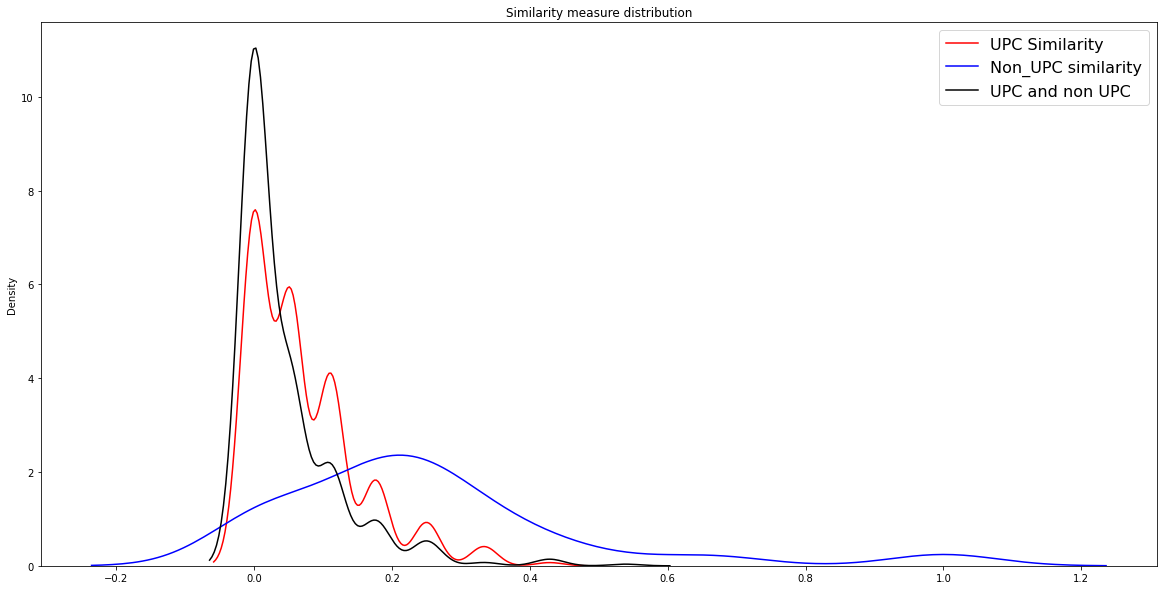

In [ ]:
plt.figure(figsize=(20,10))

sns.distplot(UPC_similarity,kde=True, hist=False, label="UPC Similarity",color='red')
sns.distplot(non_UPC_similarity,kde=True, hist=False, label="Non_UPC similarity",color='blue')
sns.distplot(UPC_non_UPC,kde=True, hist=False, label="UPC and non UPC",color='black')

plt.title("Similarity measure distribution")
plt.legend(prop={'size': 16})